# Volume of Injected Gel  (V.I.G.)
Designed by Hao Wang $$ $$
Version 1.2 --last update 2023-Feb-10$$ $$
Email harrywang11@126.com for any problem

In [92]:
# not so necessary imports
import numpy as np
from matplotlib import pyplot as plt
from skimage import io
import cv2
from skimage import transform, morphology, filters
import os
from PIL import Image, ImageFilter
import scipy

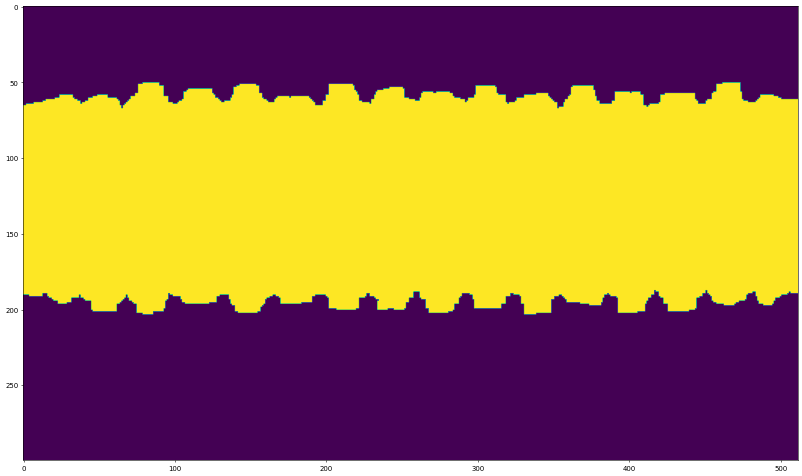

In [139]:
loc = os.getcwd() 
dirr = loc+'/wafer/'
iggg = dirr+'wafer3.tif' # get file name
img = io.imread(iggg)    # change file name here
x=img[49,100:400,:] # get the gel reigion
# scale to norm
scale = np.amax(x)
y = x/scale
y=y*256
int_x1 = y.astype(int)
# get threshold
thres=np.percentile(int_x1, 50)
#print(thres)
# change to binary
int_x1[int_x1<thres]=0
int_x1[int_x1>=thres]=1
# fill the small holes
tt=scipy.ndimage.binary_fill_holes(int_x1)
# show image
# remove noise
kernel = np.ones((6, 6), np.uint8)
gg = tt.astype('uint8')
fig = plt.figure(figsize=(20, 20), dpi=50)
opening = cv2.morphologyEx(gg, cv2.MORPH_OPEN, kernel)
plt.imshow(opening)

In [90]:
# calculate the area of wanted region
def get_area(imm):
    x=imm[100:400,:]
    scale = np.amax(x)
    y = x/scale
    y=y*256
    int_x1 = y.astype(int)
    thres=np.percentile(int_x1, 50)
    #print(thres)
    int_x1[int_x1<thres]=0
    int_x1[int_x1>=thres]=1
    tt=scipy.ndimage.binary_fill_holes(int_x1)
    # show image
    kernel = np.ones((6, 6), np.uint8)
    gg = tt.astype('uint8')
    opening = cv2.morphologyEx(gg, cv2.MORPH_OPEN, kernel)
    # return a percentage of the area coverage
    return np.count_nonzero(opening)/300/512

In [140]:
# loop through all layer of gel in the z stack
totoal = []
for i in range(50):
    locc = get_area(img[i])
    totoal.append(locc)
np.average(totoal[:40])

0.47051448567708326

In [141]:
totoal

[0.45508463541666666,
 0.45427083333333335,
 0.4558333333333333,
 0.45647786458333334,
 0.4543359375,
 0.45669921875,
 0.456875,
 0.4568098958333333,
 0.456328125,
 0.4562109375,
 0.4568359375,
 0.4566731770833333,
 0.4570182291666667,
 0.45721354166666667,
 0.45716796875,
 0.4612174479166667,
 0.46509765625,
 0.4761783854166667,
 0.49092447916666665,
 0.49500651041666666,
 0.48923177083333336,
 0.468671875,
 0.4594010416666667,
 0.4729817708333333,
 0.46240234375,
 0.46745442708333335,
 0.46177083333333335,
 0.4954427083333333,
 0.5083854166666667,
 0.45830078125,
 0.50544921875,
 0.4757942708333333,
 0.47254557291666666,
 0.4999609375,
 0.4664127604166667,
 0.50611328125,
 0.47447265625,
 0.4881184895833333,
 0.4919140625,
 0.46349609375,
 0.4536588541666667,
 0.45406901041666664,
 0.4563346354166667,
 0.45680338541666665,
 0.4571875,
 0.45826171875,
 0.4581380208333333,
 0.45845703125,
 0.45919921875,
 0.4593424479166667]